In [65]:
using Plots, LinearAlgebra, DifferentialEquations, StatsBase, Distributions, AutoGrad, DifferentialEquations.EnsembleAnalysis
import PlotlyJS

In [3]:
plotlyjs()

Plots.PlotlyJSBackend()

In [169]:
function simGradFlow(f, u0, tspan)
    prob = ODEProblem(f, u0, tspan)
    sol = solve(prob, SRIW1())
    return sol
end;

function plotHist(data, d)
    h = fit(Histogram, Tuple(cord for cord in data), nbins=nbins)
    h = normalize(h, mode=:pdf);
    if d==1
        display(plot(h))
    elseif d==2
        display(plot(h))
        gap1 = (h.edges[1][2] - h.edges[1][1])/2
        gap2 = (h.edges[2][2] - h.edges[2][1])/2

        xlen, ylen = size(h.weights)

        x = LinRange(first(h.edges[1])+gap1, last(h.edges[1])-gap1, xlen)
        y = LinRange(first(h.edges[2])+gap2, last(h.edges[2])-gap2, ylen);
        display(plot(x, y, h.weights, st=:surface))
    end;
end;

function simLangevin(f, g, u0, tspan; trajectories=10000, nbinsbins=50)
    d = length(u0)
    t = tspan[2]
    
    prob = SDEProblem(f, g, u0, tspan);
    ensembleprob = EnsembleProblem(prob);
    sol = solve(ensembleprob, SRIW1(), trajectories=trajectories);
    
    data = componentwise_vectors_timepoint(sol, tspan[2]);
    
    plotHist(data, d)
    
    return sol    
end;

In [170]:
V(x) = 0.5*norm(x)^2
Vgrad(x) = x;

In [171]:
function f(u, p, t)
    return -Vgrad(u)
end;

function g(u, p, t)
    return sqrt(2)
end;

In [185]:
tspan = (0.0, 10.0)
u0 = ones(2);
trajectories = 10000
nbins = 50;

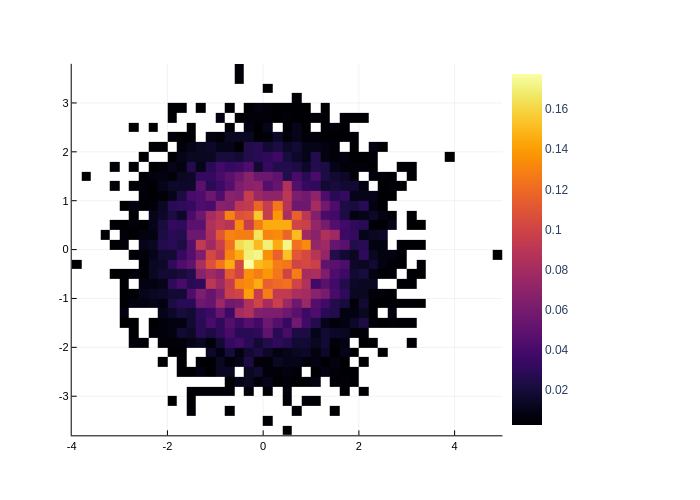

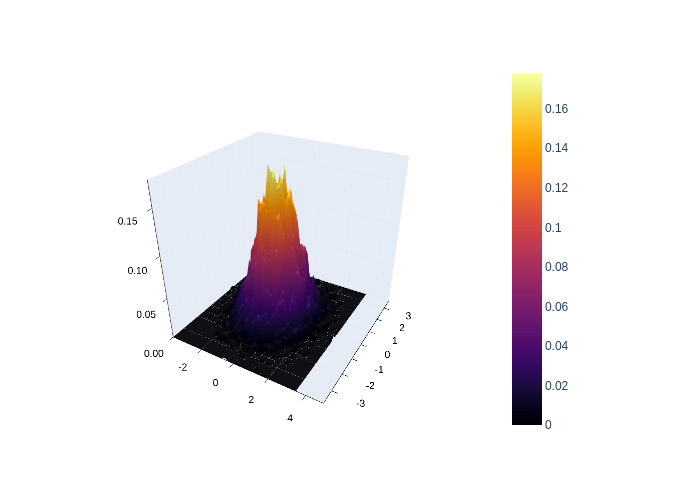

EnsembleSolution Solution of length 10000 with uType:
RODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, NoiseProcess{Float64, 2, Float64, Vector{Float64}, Vector{Float64}, Vector{Vector{Float64}}, typeof(DiffEqNoiseProcess.WHITE_NOISE_DIST), typeof(DiffEqNoiseProcess.WHITE_NOISE_BRIDGE), false, ResettableStacks.ResettableStack{Tuple{Float64, Vector{Float64}, Vector{Float64}}, false}, ResettableStacks.ResettableStack{Tuple{Float64, Vector{Float64}, Vector{Float64}}, false}, RSWM{Float64}, Nothing, RandomNumbers.Xorshifts.Xoroshiro128Plus}, SDEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, Nothing, SDEFunction{false, SciMLBase.FullSpecialize, typeof(f), typeof(g), UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, typeof(g), Base.Pairs{Symbol, Union{}, Tuple{}, NamedTu

In [186]:
sol = simLangevin(f, g, u0, tspan)

In [187]:
timeseries_point_mean(sol, sol[1].t)

t: 301-element Vector{Float64}:
  0.0
  0.00021201081674534762
  0.00044002033413844814
  0.0006965310412056862
  0.000985105586656329
  0.0013097519502883023
  0.0016749791093742723
  0.0020858596633459886
  0.0025481002865641693
  0.0030681209876846226
  0.003653144276445133
  0.004311295476300707
  0.005051715576138227
  ⋮
  9.709477415215794
  9.736759316716936
  9.765265748446751
  9.793478958680721
  9.82246316713582
  9.851322128485524
  9.879680263934366
  9.908635650869964
  9.936348608657168
  9.964937035726981
  9.993444731691651
 10.0
u: 301-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [0.9997080393179955, 0.9999617082789549]
 [0.9994692864356354, 0.9994674167845212]
 [0.9995308012982814, 0.9996445287157171]
 [0.9995393784809112, 0.9996560729891387]
 [0.999014188474469, 0.9991491663104382]
 [0.9984855538604437, 0.998937962509926]
 [0.9980998840685026, 0.9983312383931179]
 [0.997351241894102, 0.9982593405618522]
 [0.9965133090911841, 0.9975757937255763]
 [0.996266743904161,